# Translations

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("pics/goku.jpeg")

In [2]:
h, w = image.shape[:2]

half_height, half_width = h//4, w//8

In [3]:
transition_matrix = np.float32([[1, 0, half_width],
                               [0, 1, half_height]])

print(transition_matrix)

[[ 1.  0. 50.]
 [ 0.  1. 75.]]


In [4]:
img_transition = cv.warpAffine(image, transition_matrix, (w, h))
print(img_transition.shape)

(300, 400, 3)


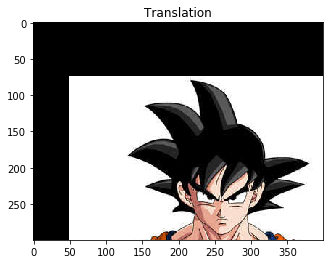

In [5]:
plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()

# Rotations

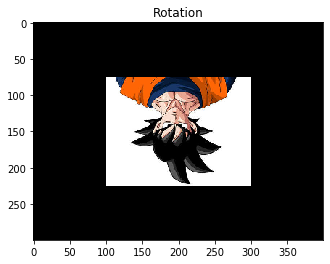

In [6]:
rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -180, 0.5)

rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

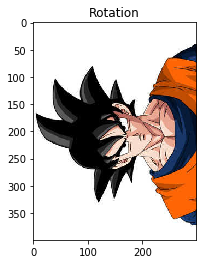

In [7]:
# We can also rotate our images with transpose

rotated_image = cv.transpose(image)
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

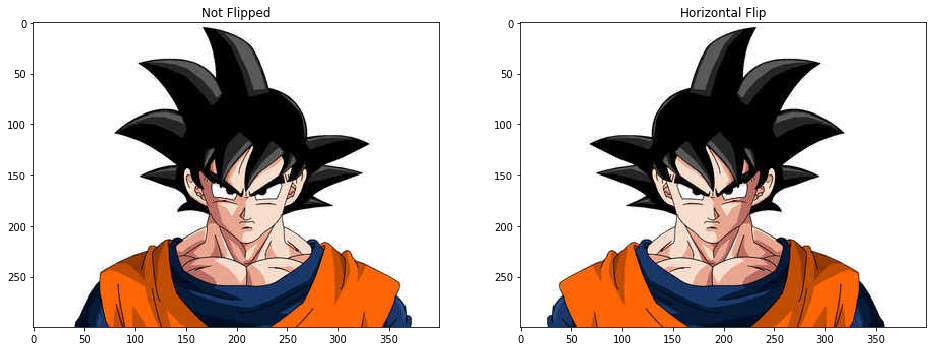

In [8]:
## horizontal flip
flipped = cv.flip(image, 1)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Not Flipped')


ax[1].imshow(cv.cvtColor(flipped, cv.COLOR_BGR2RGB))
ax[1].set_title('Horizontal Flip')

plt.show()

## Scaling, resizing and interpolations

Text(0.5, 1.0, 'Skewed Interpolation Scale')

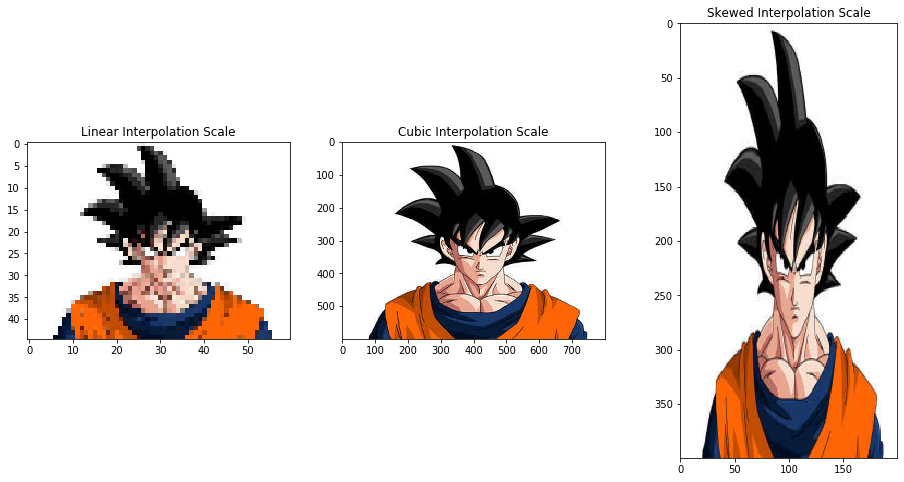

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# image size being 0.15 times of it's original size
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

# image size being 2 times of it's original size
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

# image size being 0.15 times of it's original size
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")

# Image Pyramids

In [10]:
smaller = cv.pyrDown(image)
larger = cv.pyrUp(image)

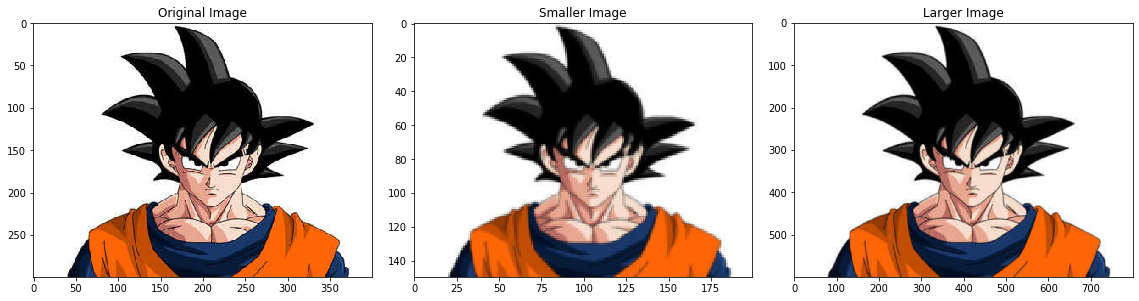

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(smaller, cv.COLOR_BGR2RGB))
ax[1].set_title("Smaller Image")

ax[2].imshow(cv.cvtColor(larger, cv.COLOR_BGR2RGB))
ax[2].set_title("Larger Image")

plt.show()

In [12]:
for i, j in ((larger, "larger"), (smaller, "smaller"), (image, "original")):
    print(f"image shape {j}:", i.shape)

image shape larger: (600, 800, 3)
image shape smaller: (150, 200, 3)
image shape original: (300, 400, 3)


## Cropping

In [13]:
h, w = image.shape[:2]

# top left of cropping rectangle
start_row, start_col = int(h*0.25), int(w*0.15)

# bottom right of cropping rectange
end_row, end_col = int(h*0.75), int(w*0.85)

cropped = image[start_row:end_row, start_col:end_col]

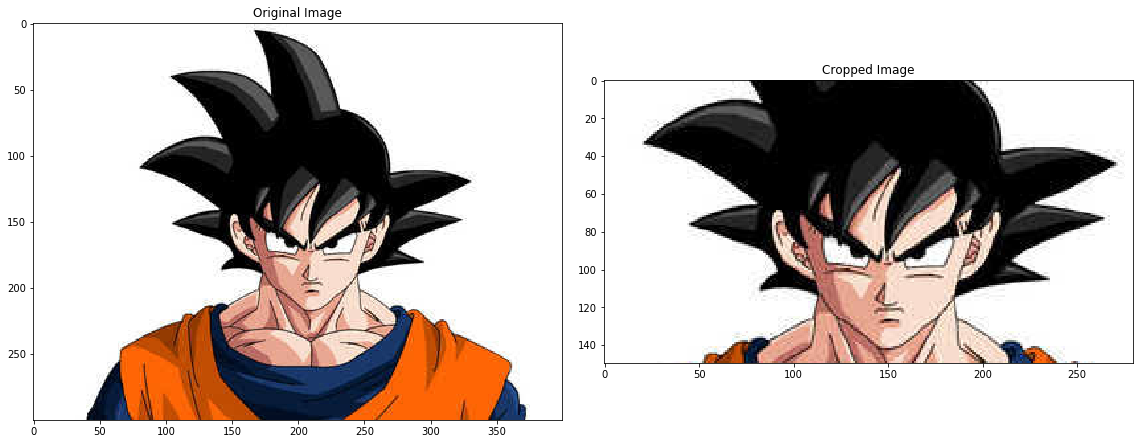

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(cropped, cv.COLOR_BGR2RGB))
ax[1].set_title("Cropped Image")

plt.show()

## Airthmetic operations

These operations allows us to increase or decrease the color intensity

In [15]:
M = np.ones(image.shape, dtype = "uint8") * 50

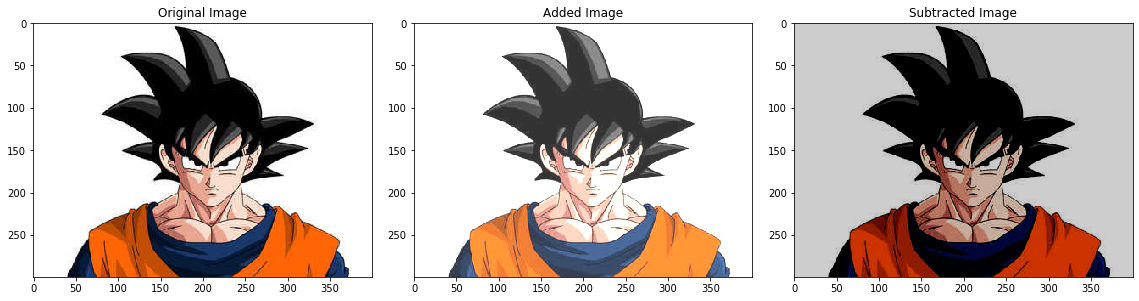

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

added = cv.add(image, M)
ax[1].imshow(cv.cvtColor(added, cv.COLOR_BGR2RGB))
ax[1].set_title("Added Image")

subtracted = cv.subtract(image, M)
ax[2].imshow(cv.cvtColor(subtracted, cv.COLOR_BGR2RGB))
ax[2].set_title("Subtracted Image")

plt.show()

# Bitwise operations and masking

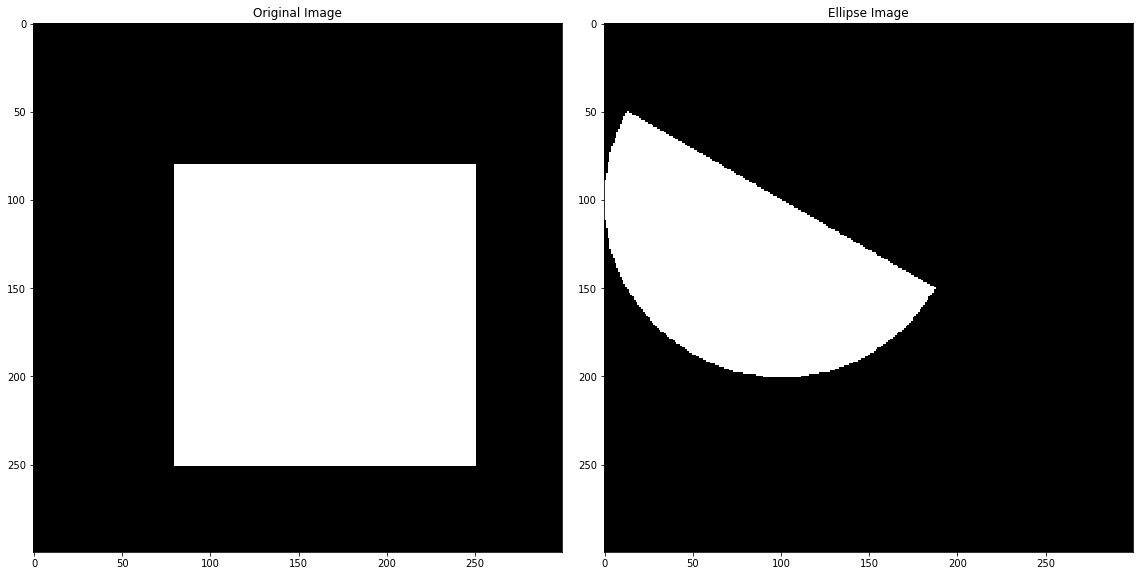

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()


# for grayscale image we don't have to add color channels
square = np.zeros((300, 300),np.uint8)
cv.rectangle(square, (80,80), (250, 250), 255, -2)
ax[0].imshow(cv.cvtColor(square, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

# Elipse
ellipse = np.zeros((300,300), np.uint8)
cv.ellipse(ellipse, (100, 100), (100, 100), 30, 0, 180, 255, -1)
ax[1].imshow(cv.cvtColor(ellipse, cv.COLOR_BGR2RGB))
ax[1].set_title("Ellipse Image")

plt.show()

## Bitwise operations

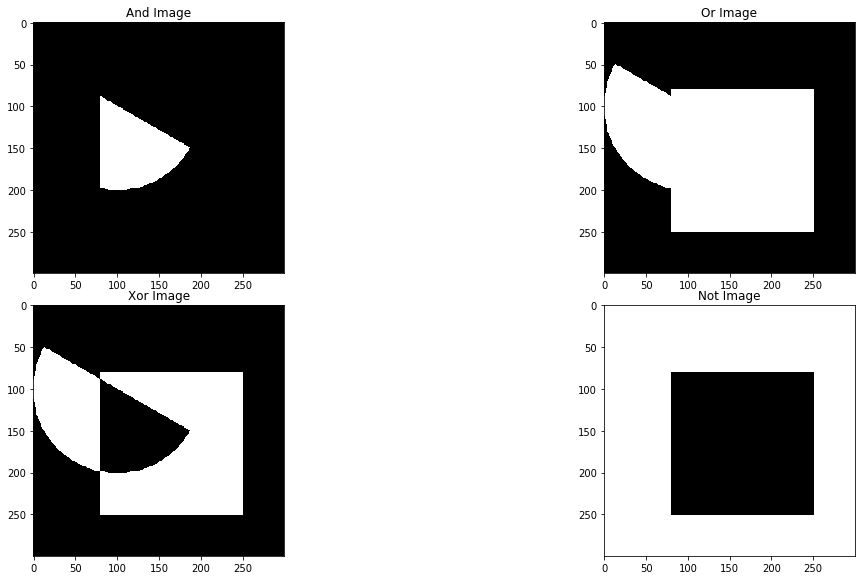

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout()

And = cv.bitwise_and(square, ellipse)
ax[0][0].imshow(cv.cvtColor(And, cv.COLOR_BGR2RGB))
ax[0][0].set_title("And Image")

Or = cv.bitwise_or(square, ellipse)
ax[0][1].imshow(cv.cvtColor(Or, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Or Image")

Xor = cv.bitwise_xor(square, ellipse)
ax[1][0].imshow(cv.cvtColor(Xor, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Xor Image")

Not = cv.bitwise_not(square, ellipse)
ax[1][1].imshow(cv.cvtColor(Not, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Not Image")

plt.show()

## Convolution and blurring

Text(0.5, 1.0, 'Original Image')

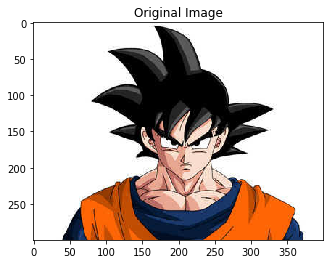

In [19]:
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Original Image")

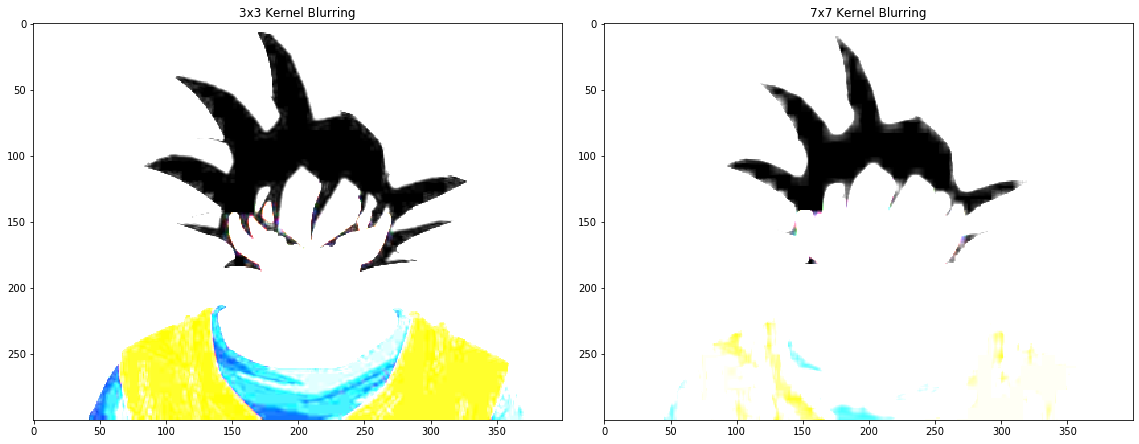

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

kernel_3x3 = np.ones((3, 3), np.float32)

# To conovolve the kernel on an image we can use cv.filter2D
blur = cv.filter2D(image, -1, kernel_3x3)
ax[0].imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))
ax[0].set_title('3x3 Kernel Blurring')

kernel_7x7 = np.ones((7, 7), np.float32)
blur2 = cv.filter2D(image, -1, kernel_7x7)
ax[1].imshow(cv.cvtColor(blur2, cv.COLOR_BGR2RGB))
ax[1].set_title('7x7 Kernel Blurring')

plt.show()

# Other blurring methods

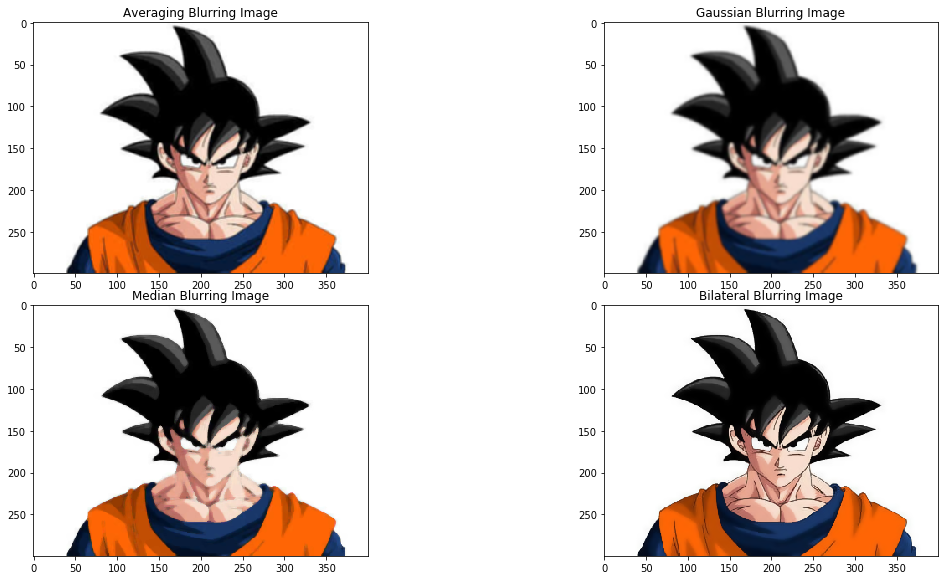

In [21]:
"""
Average Blurring: It is done by convolving the image with a normalized box filter.
This takes the pixels under the box and replaces the central element.

Gaussain Blurring: Takes Gaussian kernel instead of the box filter

Median Blurring: Takes the median of all the pixels under the kernel area and central
element is replaced with the median value

Bilateral Blurring: It is very effective in removing the noise from the image while keeping
the edges sharp.
"""

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout()

avg_blur = cv.blur(image, (3, 3))
ax[0][0].imshow(cv.cvtColor(avg_blur, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Averaging Blurring Image")

gaus_blur = cv.GaussianBlur(image, (7, 7), 0)
ax[0][1].imshow(cv.cvtColor(gaus_blur, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Gaussian Blurring Image")

med_blur =  cv.medianBlur(image, 5) 
ax[1][0].imshow(cv.cvtColor(med_blur, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Median Blurring Image")

bil_blur = cv.bilateralFilter(image, 9, 75, 75)
ax[1][1].imshow(cv.cvtColor(bil_blur, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Bilateral Blurring Image")

plt.show()

## Image De-noising

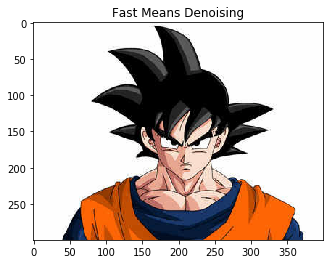

In [22]:
dst = cv.fastNlMeansDenoisingColored(image, None, 10, 10, 10, 0)

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.title("Fast Means Denoising")
plt.show()

# Sharpening

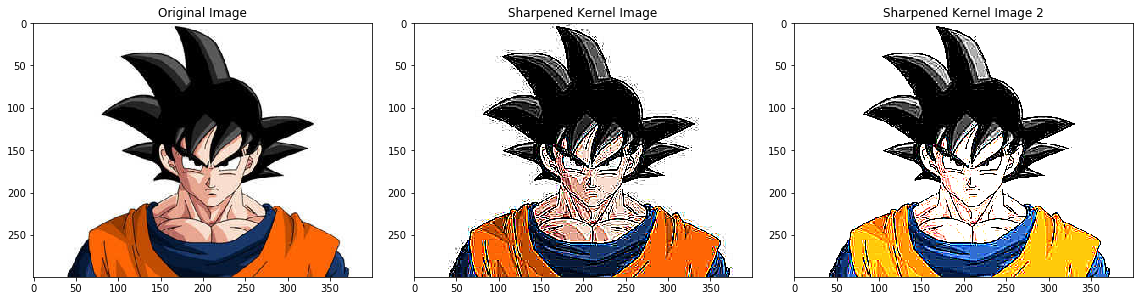

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()


# To conovolve the kernel on an image we can use cv.filter2D
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

kernel_sharpening_2 = np.array([[-1, -1, -1],
                             [-1, 10, -1],
                             [-1, -1, -1]])

sharpened = cv.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')


sharpened_2 = cv.filter2D(image, -1, kernel_sharpening_2)
ax[2].imshow(cv.cvtColor(sharpened_2, cv.COLOR_BGR2RGB))
ax[2].set_title('Sharpened Kernel Image 2')



plt.show()

## Thresholding, Binarization and Adaptive thresholding

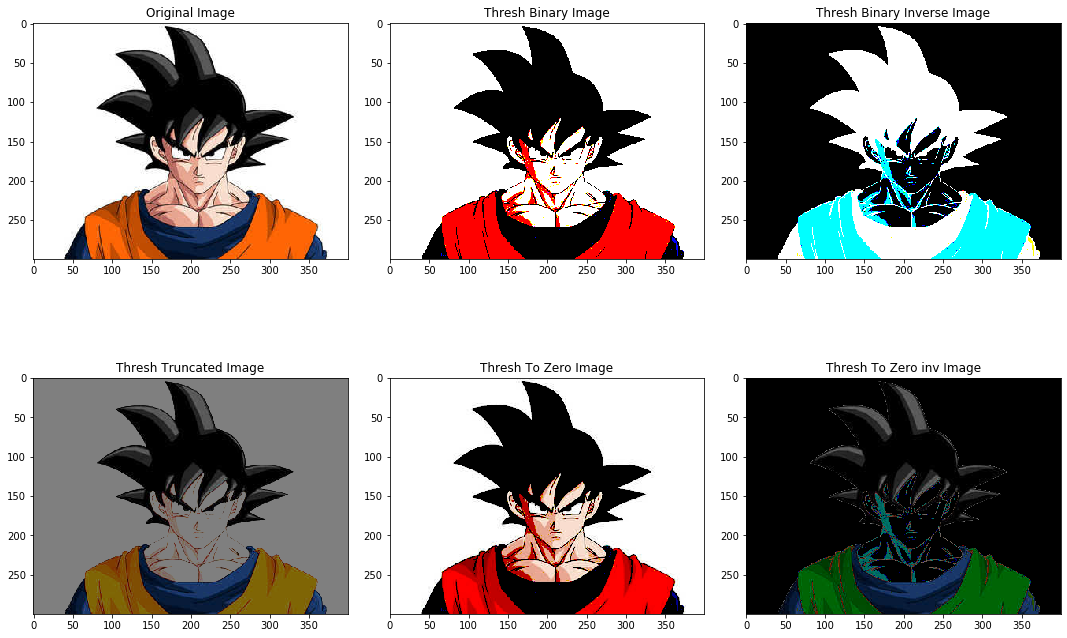

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout()

ax[0][0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original Image')

ret, thresh = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
ax[0][1].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
ax[0][1].set_title('Thresh Binary Image')

ret, thresh = cv.threshold(image, 127, 255, cv.THRESH_BINARY_INV)
ax[0][2].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
ax[0][2].set_title('Thresh Binary Inverse Image')


ret, thresh = cv.threshold(image, 127, 255, cv.THRESH_TRUNC)
ax[1][0].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
ax[1][0].set_title('Thresh Truncated Image')


ret, thresh = cv.threshold(image, 127, 255, cv.THRESH_TOZERO)
ax[1][1].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
ax[1][1].set_title('Thresh To Zero Image')


ret, thresh = cv.threshold(image, 127, 255, cv.THRESH_TOZERO_INV)
ax[1][2].imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
ax[1][2].set_title('Thresh To Zero inv Image')

plt.show()

The biggest problem with the above methods is we have to provide some threshold value, but we can fix this with the help of Adaptive thresholding but keep in mind that Adaptive threshoding works only with grayscale images, so you better change your image into a  grayscale one.

In [25]:
## Changing into gray scale
img = cv.imread("pics/goku.jpeg", 0)
img = cv.medianBlur(img, 5)

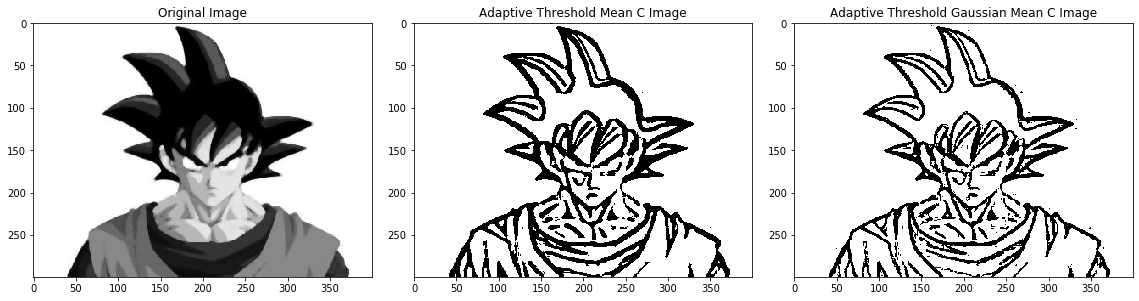

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
ax[0].set_title("Original Image")

thresh_1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                               cv.THRESH_BINARY, 11, 2)
ax[1].imshow(cv.cvtColor(thresh_1, cv.COLOR_RGB2BGR))
ax[1].set_title("Adaptive Threshold Mean C Image")


thresh_2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv.THRESH_BINARY, 11, 2)
ax[2].imshow(cv.cvtColor(thresh_2, cv.COLOR_RGB2BGR))
ax[2].set_title("Adaptive Threshold Gaussian Mean C Image")

plt.show()


## Otsu's binarization

In global thresholding, we used an arbitary value for threshold value, so how can we select a value which is good or bad. So the answer is trial and error.

Consider a bimodal image, in bimodal image an image whose histogram has two peaks. for that image, we can approx take a value in the middle of those peaked values. This is called otsu's binarization.

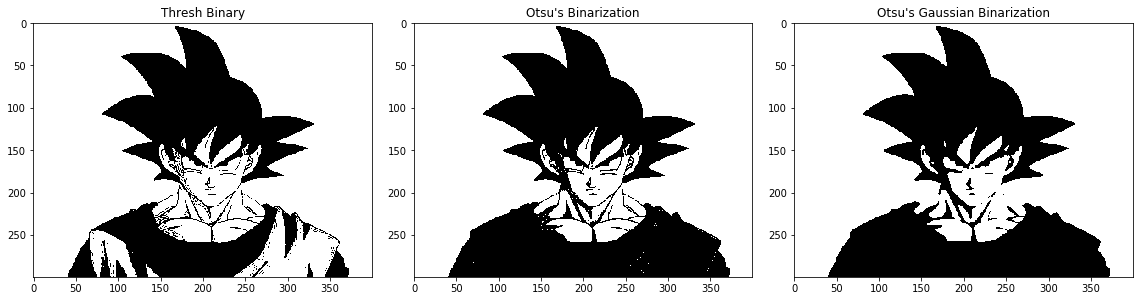

In [27]:
img = cv.imread("pics/goku.jpeg", 0)
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ret, th = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ax[0].imshow(cv.cvtColor(th, cv.COLOR_RGB2BGR))
ax[0].set_title("Thresh Binary")

ret1, th1 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ax[1].imshow(cv.cvtColor(th1, cv.COLOR_RGB2BGR))
ax[1].set_title("Otsu's Binarization")

img = cv.GaussianBlur(img, (5, 5), 0)
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ax[2].imshow(cv.cvtColor(th2, cv.COLOR_RGB2BGR))
ax[2].set_title("Otsu's Gaussian Binarization")

plt.show()
